# Fundamentos de Imagens Digitais

Esse tutorial tem como objetivo mostrar alguns conceitos básicos de manipulação de imagens digitais. É importante observar nessa aula como a manipulação dos valores das matrizes que compõem a imagem permite modifica-las.

## Resolução Espacial

A primeira tarefa é utilizar um método do pacote **transform** do **skimage** para alterar a resolução espacial da imagem. Vamos aplicar essa tarefa à imagem da Lena mostrada na aula anterior.

In [2]:
# Importando os pacotes necessários
import scipy
import numpy as np
import skimage
from skimage import transform
from scipy import misc
from matplotlib.pyplot import imshow
from scipy.misc.pilutil import Image

#Desabilitando Warning
import warnings
warnings.filterwarnings('ignore')

# Força ao matplot plotar as imagens no Jupyter Notebook
%matplotlib inline

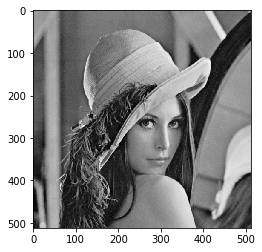

In [3]:
# Carregando a imagem
gray_image = Image.open('../images/lena.png')

# Transformando o arquivo em um array (Será explicado a seguir que array é este)
gray_image = np.asarray(gray_image)

# Exibindo uma imagem em preto e branco
imshow(gray_image, cmap='gray')

A imagem da lena tem o tamanho de 512x512. 

In [4]:
print(gray_image.shape)

(512, 512)


Vamos modificar o tamanho da imagem.

(256, 256)


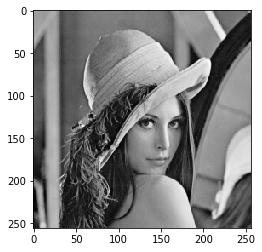

In [5]:
#Redimensionando a imagem para 256x256
new_img = transform.resize(gray_image, (256, 256))

#Imprimindo a imagem
imshow(new_img, cmap='gray')

print(new_img.shape)

Vamos reduzir mais a imagem

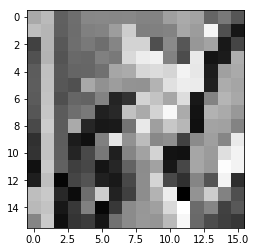

In [6]:
#Redimensionando a imagem para 64x64
new_img = transform.resize(gray_image, (16, 16))

#Imprimindo a imagem
imshow(new_img, cmap='gray')

Observe o efeito negativo na imagem a medida que reduzimos a sua resolução espacial. A imagem fica cada vez mais "quadriculada". Isso se dá porque a quantidade de pixels utilizados não é suficiente para representar todos os detalhes da cena. 

O mesmo método pode ser usado para aumentar a imagem. Verifique o tamanho da imagem na escala numérica da imagem.

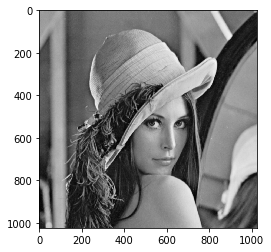

In [7]:
new_img = transform.resize(gray_image, (1024, 1024))

imshow(new_img, cmap='gray')

### Resolução Espacial: modificando diretamente a matriz

Uma outra forma de mudar a resolução espacial de uma imagem é fazer a manipulação direta da matriz. No exemplo a seguir iremos dobrar o tramanho da imagem criando uma nova matriz e copiando as informações de uma matriz para outra. 

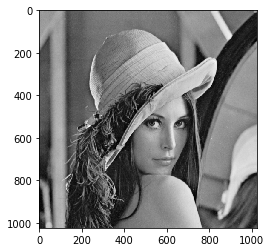

In [8]:
import numpy as np

tamanho_imagem = gray_image.shape

fator = 2

M = tamanho_imagem[0]*fator
N = tamanho_imagem[1]*fator

new_image = np.zeros((M, N),dtype='uint8')

for i in range(0, M):
    for j in range(0, N):
        new_i = int(i/fator)
        new_j = int(j/fator)
        new_image[i, j] = gray_image[new_i, new_j]

imshow(new_image, cmap='gray')

Podemos utilizar método parecido para reduzir o tamanho da imagem. Isso será passado como atividade.

# Vizinhança

Uma informação importante que devemos obter de uma imagem é a vizinhança. Estudamos duas vizinhança: vizinhança 4 e vizinhança 8. Vamos implementar um método que dada a posição de um pixel, retorna os vizinhos deste pixel.

In [9]:
# Definindo a função vizinhanca4

def vizinhanca4(linha, coluna):
    v1 = (linha - 1, coluna)
    v2 = (linha, coluna - 1)
    v3 = (linha + 1, coluna)
    v4 = (linha, coluna + 1)
    
    vizinhanca = [v1, v2, v3, v4]
    
    return vizinhanca

def vizinhanca8(linha, coluna):
    v5 = (linha - 1, coluna - 1)
    v6 = (linha - 1, coluna + 1)
    v7 = (linha + 1, coluna - 1)
    v8 = (linha + 1, coluna + 1)
    
    vizinhanca = vizinhanca4(linha, coluna) + [v5, v6, v7, v8]
    
    return vizinhanca
    

Podemos usar agora estes métodos na imagem teste da Lena e retornar os valores dos níveis de cinza na vizinhanca indicada.

In [39]:
indices_vizinhanca = vizinhanca4(10, 10)

print("Indice: ", (10, 10), " | Nivel de Cinza: ", gray_image[(10, 10)])

for indice in indices_vizinhanca:
    print("Indice: ", indice, " | Nivel de Cinza: ", gray_image[indice])

Indice:  (10, 10)  | Nivel de Cinza:  153
Indice:  (9, 10)  | Nivel de Cinza:  151
Indice:  (10, 9)  | Nivel de Cinza:  154
Indice:  (11, 10)  | Nivel de Cinza:  153
Indice:  (10, 11)  | Nivel de Cinza:  152


Uma das aplicações dos conceitos de vizinhança é no destaque do contorno de imagens. Vamos utilizar como exemplo, uma imagem binária. O objetivo é destacar a borda do objeto de cor preta que está na imagem.

Vamos relembrar o que foi dito sobre destaque de bordas na aula: 

* A borda de um componente conexo S em uma imagem bidimensional é o conjunto de pixels pertencentes ao componente e que possuem vizinhança-4 com um ou mais pixels externos a S;
* Logo, a borda corresponde ao conjunto de pontos no contorno do componente conexo;
* O interior é o conjunto de pixels S que não estão em sua borda;

Para que um pixel não faça parte da borda, todos os pixels de sua vizinhança4 deve conter a mesma característica do componente que está sendo analisado. Como vamos trabalhar com uma imagem binária, basta olhar se a vizinhança4 deste pixel possui algum pixel com cor distinta a dele. Se isso acontecer é porque este pixel está próximo a um pixel de fundo da imagem, logo ele está na borda. 

Como não temos uma imagem binária já pronta, vamos gerar uma imagem a partir de um array criado. Vamos criar uma imagem 50x50 toda branca e em seguida colocar um quadrado preto centralizado na imagem de tamanho 40x40. 

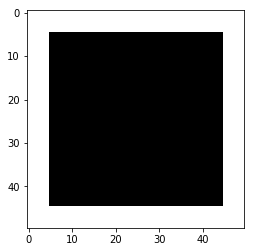

In [85]:
# Importa o pacote necessário
import numpy as np

# Cria um array só de uns
imagem_test = np.ones((50,50), dtype='uint8')*2

imagem_test[5:45,5:45] = 0

imshow(imagem_test, cmap='gray')

Função para identificar bordas em uma imagem binária.

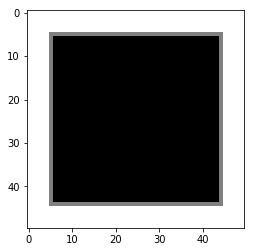

In [86]:
def highlight_border(image):
    
    M, N = image.shape
    
    new_image = np.zeros((M, N), dtype='uint8')
    
    for i in range(0, M):
        for j in range(0, N):
            
            new_image[i, j] = image[i, j]
            
            if image[i, j] == 0:
                
                neighbors = vizinhanca4(i, j)
                
                sum_value = np.sum([image[x] for x in neighbors])
                
                if sum_value != 0:
                    new_image[i, j] = 1
                
                
    return new_image



new_ = highlight_border(imagem_test)
imshow(new_, cmap='gray')

Outra aplicação do uso de vizinhança é a identificação de componentes conexos. Isso também será passado como atividade.